<a class="anchor" id="0"></a>
# Bayesian network for the competition "Titanic: Machine Learning from Disaster"

## 1. Import libraries <a class="anchor" id="1"></a>


In [1]:
!pip install bnlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=9071cfeb695bd4c35644fe10e647b90a5075fba38eb5a8537a233468e24bdec0
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## 2. Download datasets <a class="anchor" id="2"></a>


In [5]:
titanic=pd.read_csv("Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train, test = train_test_split(titanic, test_size=0.2, random_state=42)

train = train.set_index('PassengerId')
test = test.set_index('PassengerId')


In [7]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.500,C124,S
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.000,NaN,S
383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.925,NaN,S


In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Dropping columns with many unique values
drop_list = ['Name', 'Age', 'Cabin', 'Ticket', 'Fare']
train = train.drop(columns=drop_list)
test = test.drop(columns=drop_list)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 332 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  712 non-null    int64 
 1   Pclass    712 non-null    int64 
 2   Sex       712 non-null    object
 3   SibSp     712 non-null    int64 
 4   Parch     712 non-null    int64 
 5   Embarked  710 non-null    object
dtypes: int64(4), object(2)
memory usage: 38.9+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 710 to 11
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  179 non-null    int64 
 1   Pclass    179 non-null    int64 
 2   Sex       179 non-null    object
 3   SibSp     179 non-null    int64 
 4   Parch     179 non-null    int64 
 5   Embarked  179 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.8+ KB


In [13]:
# Data preparing
dfhot_train, dfnum_train = bn.df2onehot(train)
dfhot_test, dfnum_test = bn.df2onehot(test)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 6/6 [00:00<00:00, 172.30it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 6/6 [00:00<00:00, 180.00it/s]


[df2onehot] >Total onehot features: 18

[df2onehot] >Auto detecting dtypes.


100%|██████████| 6/6 [00:00<00:00, 262.94it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 6/6 [00:00<00:00, 261.51it/s]

[df2onehot] >Total onehot features: 15


## 3. Creation the Bayesian network <a class="anchor" id="3"></a>


In [14]:
dfnum_train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,1,1,1,1,3
1,0,2,1,1,1,3
2,0,3,1,1,1,3
3,0,3,1,2,1,3
4,0,3,0,5,3,3
...,...,...,...,...,...,...
707,1,3,0,1,1,3
708,0,1,1,1,1,3
709,0,3,1,3,1,3
710,1,1,0,2,3,3


In [15]:
dfnum_target = dfnum_train.pop('Survived')

In [16]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Pclass,Sex,SibSp,Parch,Embarked,Survived
691,3,1,1,1,1,0
266,1,1,1,1,3,0
17,1,0,1,1,1,1
477,3,0,1,1,3,0
302,3,0,2,2,3,0
...,...,...,...,...,...,...
707,3,0,1,1,3,1
192,2,1,2,2,1,0
629,3,1,1,1,3,0
559,3,0,1,1,1,1


In [17]:
# Get score
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

### Model 1

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


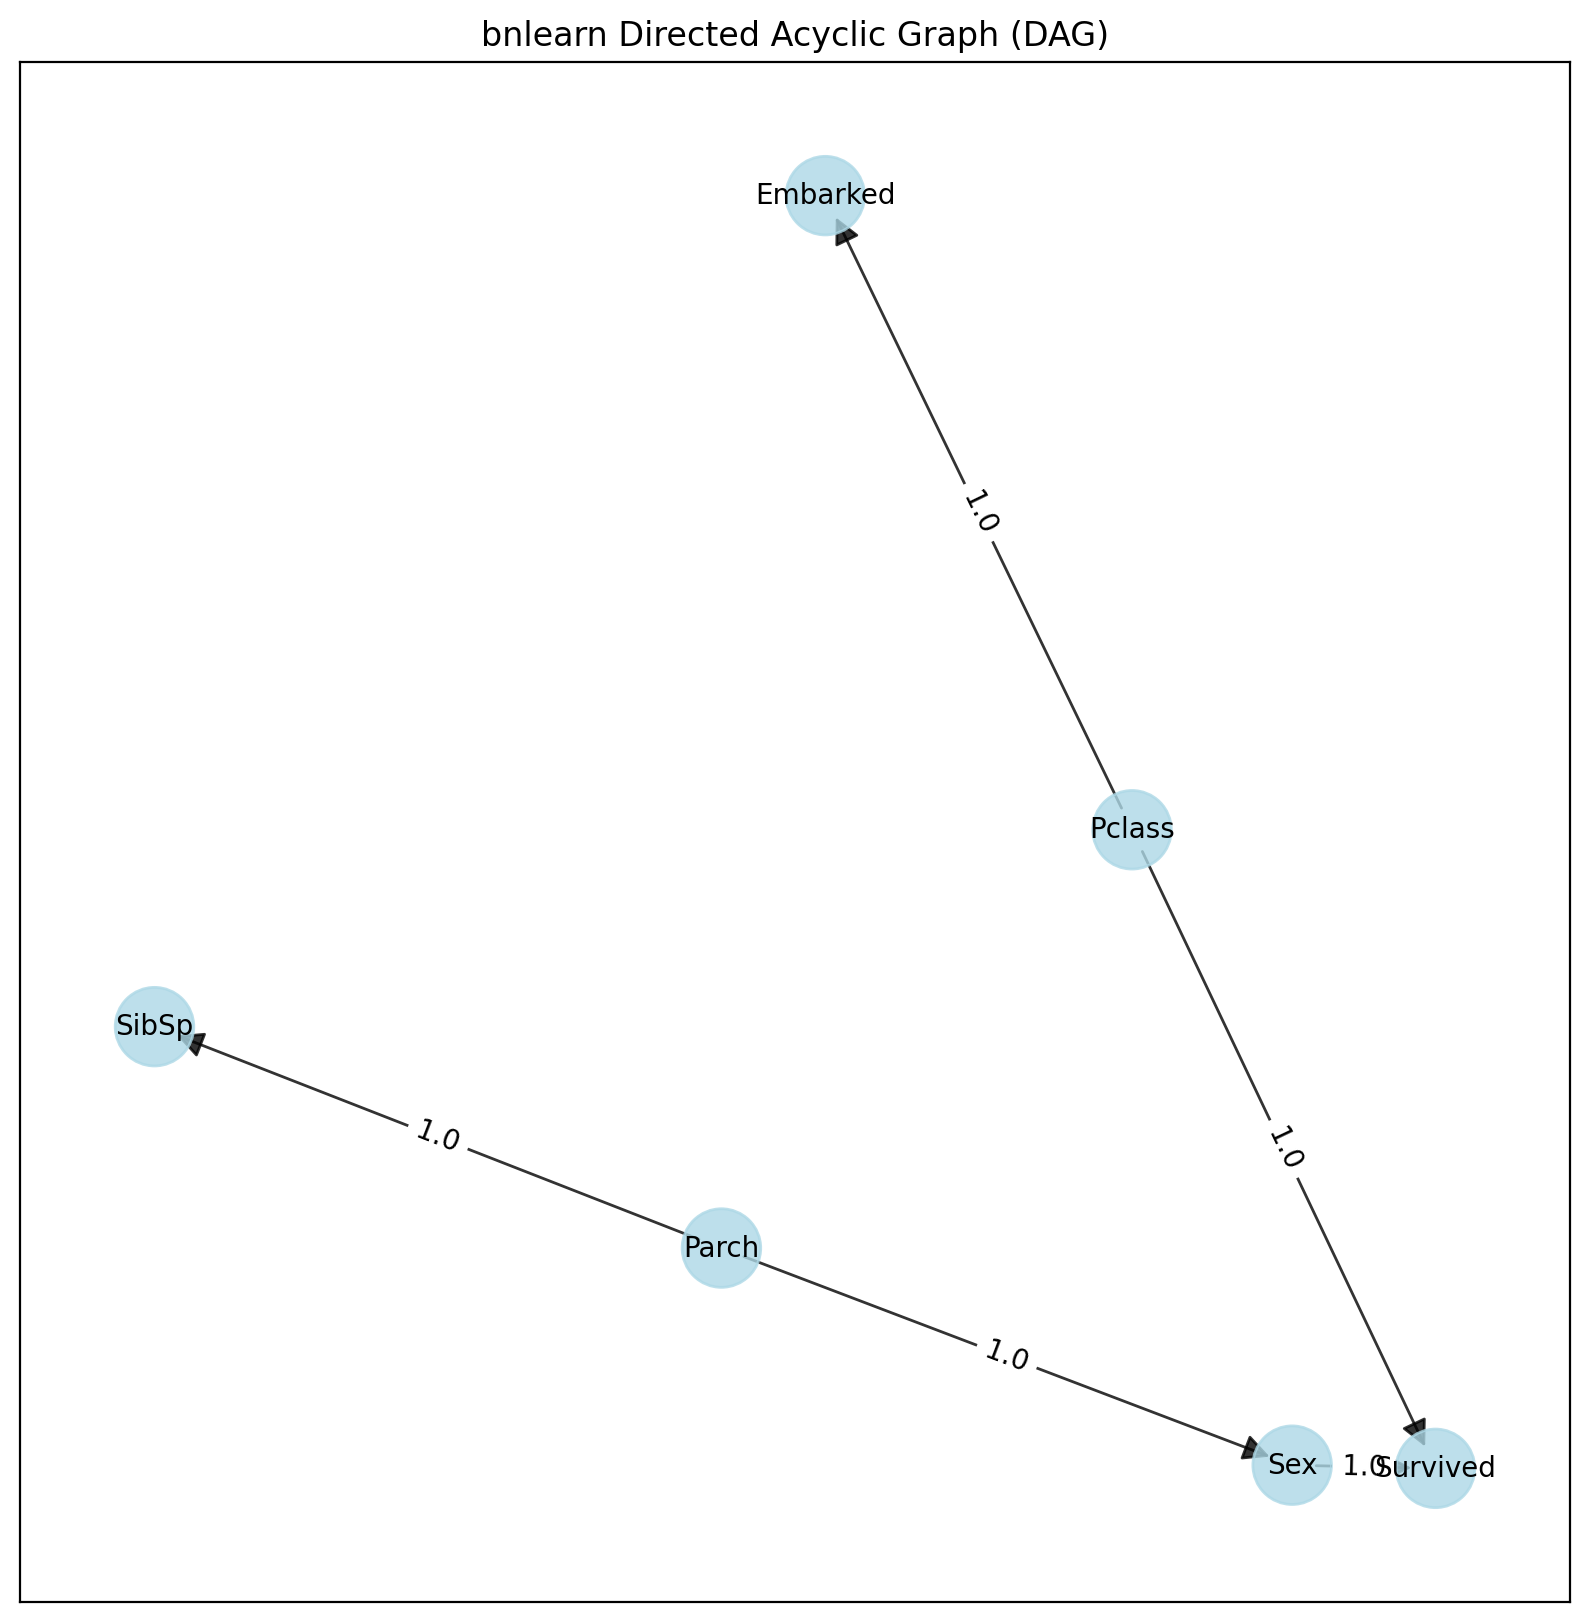

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pclass:
+-----------+----------+
| Pclass(1) | 0.295942 |
+-----------+----------+
| Pclass(2) | 0.292118 |
+-----------+----------+
| Pclass(3) | 0.41194  |
+-----------+----------+
[bnlearn] >CPD of Embarked:
+-------------+---------------------+-----+---------------------+
| Pclass      | Pclass(1)           | ... | Pclass(3)           |
+-------------+---------------------+-----+---------------------+
| Embarked(0) | 0.18162239770279973 | ... | 0.1289324394017535  |
+-------------+---------------------+-----+---------------------+
| Embarked(1) | 0.2785355348169419  | ... | 0.19700876740587933 |
+-------------+---------------------+-----+---------------------+
| Embarked(2) | 0.18377602297200288 | ... | 0.19236719958741622 |
+-------------+---------------------+-----+------

In [18]:
%%time
# Structure learning
DAG = bn.structure_learning.fit(dfnum, methodtype='hc', root_node='Survived', bw_list_method='nodes', verbose=3)

# Plot
G = bn.plot(DAG)

# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);

In [19]:
# About the model
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x7dbeb3950cb0>,
 'adjmat': target    Pclass    Sex  SibSp  Parch  Embarked  Survived
 source                                                   
 Pclass     False  False  False  False      True      True
 Sex        False  False  False  False     False      True
 SibSp      False  False  False  False     False     False
 Parch      False   True   True  False     False     False
 Embarked   False  False  False  False     False     False
 Survived   False  False  False  False     False     False,
 'config': {'verbose': 3, 'method': 'bayes', 'n_jobs': -1},
 'model_edges': [('Pclass', 'Embarked'),
  ('Pclass', 'Survived'),
  ('Sex', 'Survived'),
  ('Parch', 'Sex'),
  ('Parch', 'SibSp')],
 'structure_scores': {'k2': np.float64(-2533.9803412444385),
  'bic': np.float64(-2567.831980990379),
  'bdeu': np.float64(-2530.173898690966),
  'bds': np.float64(-2544.0368423021646)},
 'independence_test': None}

In [20]:
# Get score of the model1
acc1 = get_acc(model, valid, 'Survived')

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 53/53 [00:00<00:00, 831.91it/s]

     Survived         p
0           0  0.511780
1           0  0.718298
2           0  0.718298
3           0  0.605517
4           0  0.718298
..        ...       ...
138         1  0.606154
139         0  0.559508
140         0  0.718298
141         1  0.606154
142         0  0.718298

[143 rows x 2 columns]
Accuracy - 0.7062937062937062


### Model 2

[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 5
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


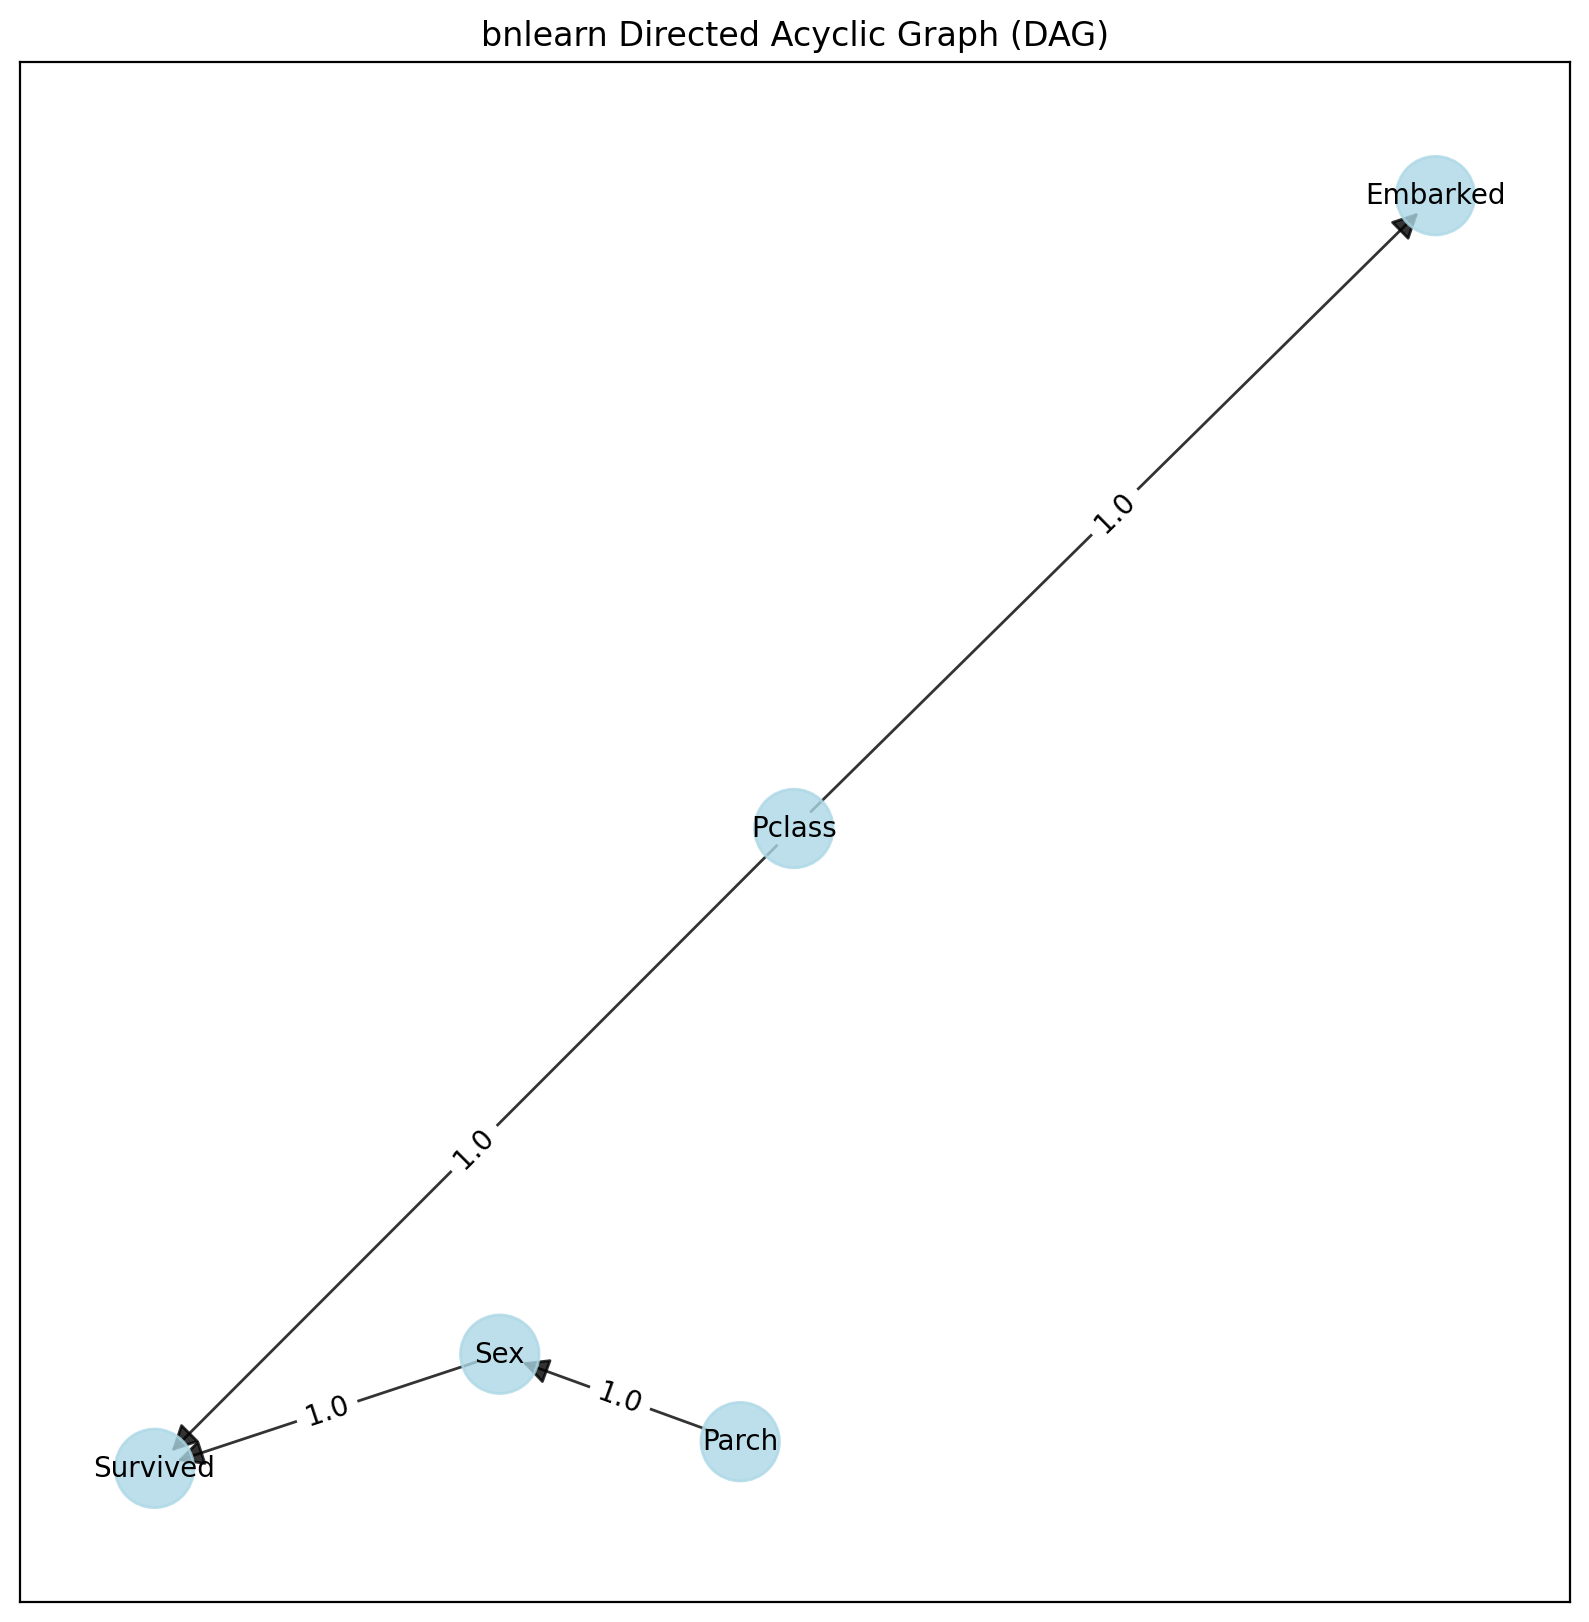

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['SibSp']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pclass:
+-----------+----------+
| Pclass(1) | 0.295942 |
+-----------+----------+
| Pclass(2) | 0.292118 |
+-----------+----------+
| Pclass(3) | 0.41194  |
+-----------+----------+
[bnlearn] >CPD of Embarked:
+-------------+---------------------+-----+---------------------+
| Pclass      | Pclass(1)           | ... | Pclass(3)           |
+-------------+---------------------+-----+---------------------+
| Embarked(0) | 0.18162239770279973 | ... | 0.1289324394017535  |
+-------------+---------------------+-----+---------------------+
| Embarked(1) | 0.2785355348169419  | ... | 0.19700876740587933 |
+-------------+---------------------+-----+---------------------+
| Embarked(2) | 0.18377602297200

In [21]:
%%time
# Structure learning
DAG2 = bn.structure_learning.fit(dfnum, methodtype='hc', black_list=['SibSp'], root_node='Survived', bw_list_method='nodes', verbose=4)

# Plot
G2 = bn.plot(DAG2)

# Parameter learning
model2 = bn.parameter_learning.fit(DAG2, dfnum, verbose=4);

In [22]:
# Score of the model2
acc2 = get_acc(model, valid.drop(columns=['SibSp']), 'Survived')

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 34/34 [00:00<00:00, 159.25it/s]

     Survived         p
0           0  0.511780
1           0  0.718298
2           0  0.718298
3           0  0.605517
4           0  0.718298
..        ...       ...
138         1  0.606154
139         0  0.559508
140         0  0.718298
141         1  0.606154
142         0  0.718298

[143 rows x 2 columns]
Accuracy - 0.7062937062937062


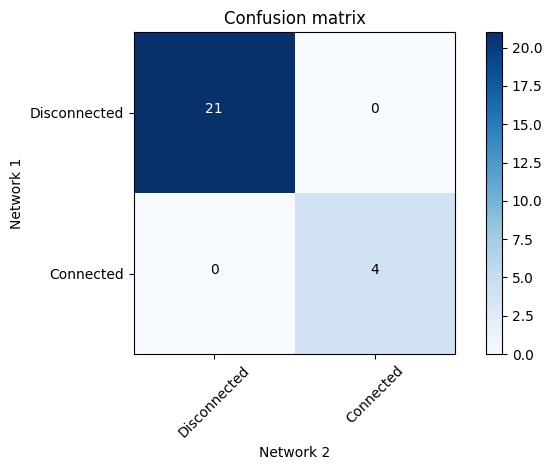

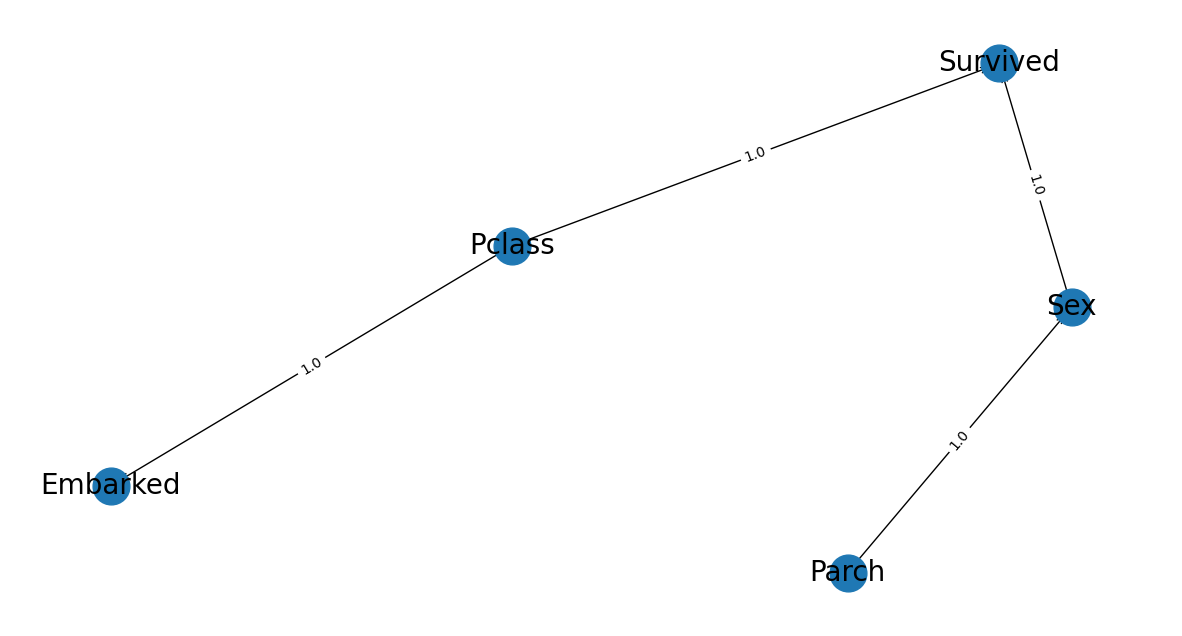

Coincidence - 1.0


In [23]:
# Models comparing
res = bn.bnlearn.compare_networks(model, model2, figsize=(15, 8), verbose=3)
print('Coincidence -', (res[0][0, 0] + res[0][1, 1])/res[0].sum())

## 4. Inference from the Bayesian network <a class="anchor" id="4"></a>


In [24]:
%%time
# Make inference
query = bn.inference.fit(model, variables=['Survived'], evidence={'Sex':True, 'Pclass':True})
print(query)
print(query.df)

# Another inference using only sex for evidence
q1 = bn.inference.fit(model, variables=['Survived'], evidence={'Sex':0})
print(query)
print(query.df)

# Print model
bn.print_CPD(model)

[bnlearn] >Variable Elimination.
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.559508 |
+----+------------+----------+
|  1 |          1 | 0.440492 |
+----+------------+----------+

Summary for variables: ['Survived']
Given evidence: Sex=True, Pclass=True

Survived outcomes:
- Survived: 0 (56.0%)
- Survived: 1 (44.0%)
+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.5595 |
+-------------+-----------------+
| Survived(1) |          0.4405 |
+-------------+-----------------+
   Survived         p
0         0  0.559508
1         1  0.440492
[bnlearn] >Variable Elimination.
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.437633 |
+----+------------+----------+
|  1 |          1 | 0.562367 |
+----+------------+----------+

Summary for variables: ['Survived']
Given evidence: Sex=

{'Pclass':    Pclass         p
 0       1  0.295942
 1       2  0.292118
 2       3  0.411940,
 'Embarked':     Embarked  Pclass         p
 0          0       1  0.181622
 1          0       2  0.181818
 2          0       3  0.128932
 3          1       1  0.278536
 4          1       2  0.212364
 5          1       3  0.197009
 6          2       1  0.183776
 7          2       2  0.188364
 8          2       3  0.192367
 9          3       1  0.356066
 10         3       2  0.417455
 11         3       3  0.481692,
 'Survived':     Survived  Pclass  Sex         p
 0          0       1    0  0.377644
 1          0       1    1  0.559508
 2          0       2    0  0.393846
 3          0       2    1  0.605517
 4          0       3    0  0.511780
 5          0       3    1  0.718298
 6          1       1    0  0.622356
 7          1       1    1  0.440492
 8          1       2    0  0.606154
 9          1       2    1  0.394483
 10         1       3    0  0.488220
 11         1       

## 5. Prediction <a class="anchor" id="5"></a>

In [25]:
# Prediction using the Bayesian network
Pout = bn.predict(model, df=dfnum_test, variables=['Survived'])
Pout

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 55/55 [00:00<00:00, 848.68it/s]


,Survived,p
0,0,0.718298
1,0,0.605517
2,0,0.718298
3,1,0.606154
4,0,0.511780
...,...,...
174,0,0.718298
175,0,0.718298
176,0,0.511780
177,1,0.606154


I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)